# Predicting Audience Ratings: A Machine Learning Pipeline



### Data Ingestion

In [2]:
# Load the dataset
file_path = 'Rotten_Tomatoes_Movies3.csv'  
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Preview:")
display(data.head())

print("\nDataset Info:")
data.info()

print("\nStatistical Summary:")
display(data.describe())

Dataset Preview:


,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  fl

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,16483.000000,16638.000000,16638.000000,16386.000000
mean,102.391494,60.466522,56.607104,60.470829
std,25.028011,28.587230,66.383800,20.462368
min,1.000000,0.000000,5.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000
50%,99.000000,66.000000,28.000000,62.000000
75%,111.000000,86.000000,76.000000,77.000000
max,2000.000000,100.000000,497.000000,100.000000


### Exploratory Data Analysis (EDA)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64


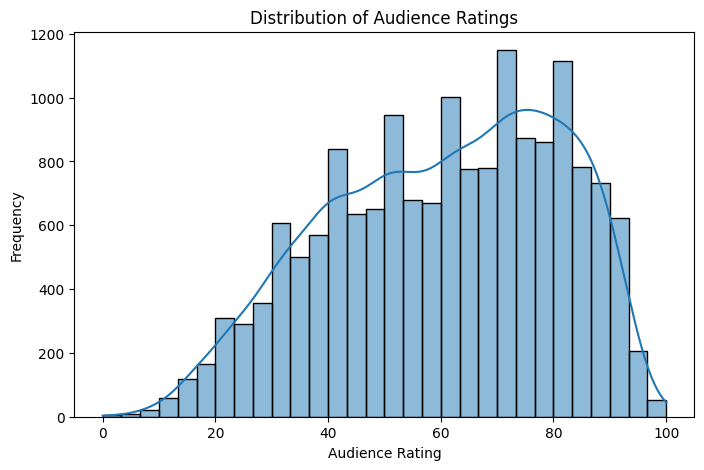

In [4]:
# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(data['audience_rating'], kde=True, bins=30)
plt.title('Distribution of Audience Ratings')
plt.xlabel('Audience Rating')
plt.ylabel('Frequency')
plt.show()

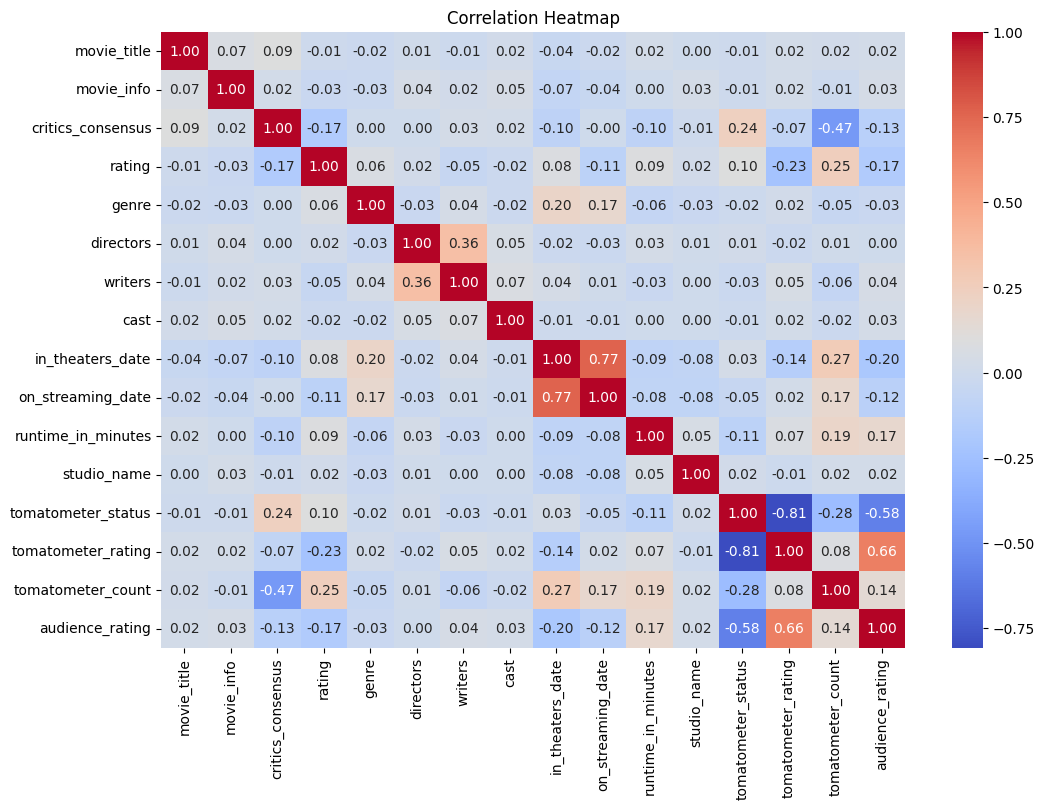

In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
data_1=data.copy()
label_encoders = {}
for column in ['movie_info','critics_consensus','movie_title', 'rating', 'genre', 'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date', 'studio_name', 'tomatometer_status']:
    le = LabelEncoder()
    data_1[column] = le.fit_transform(data_1[column])
    label_encoders[column] = le
sns.heatmap(data_1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Data Preprocessing

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Handle missing values
df = data.dropna()

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df.drop('audience_rating', axis=1)
y = df['audience_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Feature Selection

In [7]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top 10 features based on their correlation with the target variable
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the columns selected
selected_features = X.columns[selector.get_support()]

# Display the selected features
selected_features

Index(['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count',
       'rating_NR', 'rating_PG-13', 'genre_Comedy', 'genre_Horror',
       'genre_Horror, Mystery & Suspense', 'tomatometer_status_Fresh',
       'tomatometer_status_Rotten'],
      dtype='object')

### Models:


### A. Linear Regression


1. Model Building and Validation

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go
import numpy as np

# Initialize the Linear Regression model
model_lr = LinearRegression()

# Fit the model to the training data
model_lr.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_lr = model_lr.predict(X_test_selected)

# Evaluate model performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error (MSE) - LR: {mse_lr}")
print(f"R-squared (R²) Score - LR: {r2_lr}")

Mean Squared Error (MSE) - LR: 172.4063046743332
R-squared (R²) Score - LR: 0.5467843395757503


2. Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV

param_space_lr = {
    'fit_intercept': [True, False],
    'n_jobs': [None, 1],
}               
grid_search_lr = GridSearchCV(
    estimator=model_lr,
    param_grid=param_space_lr,
    scoring='r2',
    cv=5,
    verbose=2,  
    n_jobs=-1  
    )

grid_search_lr.fit(X_train_selected, y_train)

# Parameter which gives the best results
print(f"Best Parameters for LR: {grid_search_lr.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best R² Score LR: {grid_search_lr.best_score_}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters for LR: {'fit_intercept': True, 'n_jobs': None}
Best R² Score LR: 0.5371871545118777


In [16]:
y_pred_lr_best = grid_search_lr.predict(X_test_selected)

mse_lr_best = mean_squared_error(y_test, y_pred_lr_best)
r2_lr_best = r2_score(y_test, y_pred_lr_best)

print(f"Mean Squared Error (MSE) - LR: {mse_lr_best}")
print(f"R-squared (R²) Score - LR: {r2_lr_best}")

Mean Squared Error (MSE) - LR: 172.4063046743332
R-squared (R²) Score - LR: 0.5467843395757503


3. Visualisation

In [17]:
fig_lr = go.Figure()

fig_lr.add_trace(go.Scatter(
    x=y_test,
    y=y_pred_lr_best,
    mode='markers',
    name='Predicted vs Actual',
    marker=dict(color='blue', size=7)
))

min_val = min(min(y_test), min(y_pred_lr_best))
max_val = max(max(y_test), max(y_pred_lr_best))
fig_lr.add_trace(go.Scatter(
    x=[min_val, max_val],
    y=[min_val, max_val],
    mode='lines',
    name='y = x',
    line=dict(color='black', dash='dash')
))

fig_lr.update_layout(
    title='Actual vs Predicted Audience Ratings - Linear Regression',
    xaxis_title='Actual Audience Rating',
    yaxis_title='Predicted Audience Rating',
    width=800,
    height=500
)

fig_lr.show()


### B. Random Forest Regressor

1. Model Building and Validation

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Create a pipeline
model_rfr = RandomForestRegressor(random_state=42)

# Train the model
model_rfr.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_rfr = model_rfr.predict(X_test_selected)

# Evaluate model performance
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

print(f"Mean Squared Error (MSE) - RFR: {mse_rfr}")
print(f"R-squared (R²) Score - RFR: {r2_rfr}")

Mean Squared Error (MSE) - RFR: 192.96453283405478
R-squared (R²) Score - RFR: 0.49274158881811103


2. Hyperparameter Tuning

In [19]:
param_space_rfr = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
}               
grid_search_rfr = GridSearchCV(
    estimator=model_rfr,
    param_grid=param_space_rfr,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1  
    )

grid_search_rfr.fit(X_train_selected, y_train)

# Parameter which gives the best results
print(f"Best Parameters for RFR: {grid_search_rfr.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best R² Score for RFR: {grid_search_rfr.best_score_}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for RFR: {'max_depth': 10, 'n_estimators': 300}
Best R² Score for RFR: 0.5331098347965744


In [21]:
y_pred_rfr_best = grid_search_rfr.predict(X_test_selected)

mse_rfr_best = mean_squared_error(y_test, y_pred_rfr_best)
r2_rfr_best = r2_score(y_test, y_pred_rfr_best)

print(f"Mean Squared Error (MSE) - RFR: {mse_rfr_best}")
print(f"R-squared (R²) Score - RFR: {r2_rfr_best}")

Mean Squared Error (MSE) - RFR: 175.2818656470234
R-squared (R²) Score - RFR: 0.5392251655200814


3. Visualisation

In [22]:
fig_rfr = go.Figure()

fig_rfr.add_trace(go.Scatter(
    x=y_test,
    y=y_pred_rfr_best,
    mode='markers',
    name='Predicted vs Actual',
    marker=dict(color='green', size=7)
))

min_val = min(min(y_test), min(y_pred_rfr_best))
max_val = max(max(y_test), max(y_pred_rfr_best))
fig_rfr.add_trace(go.Scatter(
    x=[min_val, max_val],
    y=[min_val, max_val],
    mode='lines',
    name='y = x',
    line=dict(color='black', dash='dash')
))

fig_rfr.update_layout(
    title='Actual vs Predicted Audience Ratings - Random Forest Regressor',
    xaxis_title='Actual Audience Rating',
    yaxis_title='Predicted Audience Rating',
    width=800,
    height=500
)

fig_rfr.show()

### Gradient Boosting Regressor

1. Model Building and Validation

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a pipeline
model_gbr = GradientBoostingRegressor(random_state=29)

# Train the model
model_gbr.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_gbr = model_gbr.predict(X_test_selected)

# Evaluate model performance
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Mean Squared Error (MSE) - GBR: {mse_gbr}")
print(f"R-squared (R²) Score - GBR: {r2_gbr}")

Mean Squared Error (MSE) - GBR: 168.5588569219873
R-squared (R²) Score - GBR: 0.5568983755869105


2. Hyperparameter Tuning

In [25]:
param_space_gbr = {
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
}               
grid_search_gbr = GridSearchCV(
    estimator=model_gbr,
    param_grid=param_space_gbr,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1
    )

grid_search_gbr.fit(X_train_selected, y_train)

# Parameter which gives the best results
print(f"Best Parameters for GBR: {grid_search_gbr.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best R² Score for GBR: {grid_search_gbr.best_score_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for GBR: {'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 100}
Best R² Score for GBR: 0.5488554665373991


In [26]:
y_pred_gbr_best = grid_search_gbr.predict(X_test_selected)

mse_gbr_best = mean_squared_error(y_test, y_pred_gbr_best)
r2_gbr_best = r2_score(y_test, y_pred_gbr_best)

print(f"Mean Squared Error (MSE) - GBR: {mse_gbr_best}")
print(f"R-squared (R²) Score - GBR: {r2_gbr_best}")

Mean Squared Error (MSE) - GBR: 168.60058269356878
R-squared (R²) Score - GBR: 0.5567886883387572


3. Visualisation

In [28]:
fig_gbr = go.Figure()

fig_gbr.add_trace(go.Scatter(
    x=y_test,
    y=y_pred_gbr_best,
    mode='markers',
    name='Predicted vs Actual',
    marker=dict(color='red', size=7)
))

min_val = min(min(y_test), min(y_pred_gbr_best))
max_val = max(max(y_test), max(y_pred_gbr_best))
fig_gbr.add_trace(go.Scatter(
    x=[min_val, max_val],
    y=[min_val, max_val],
    mode='lines',
    name='y = x',
    line=dict(color='black', dash='dash')
))

fig_gbr.update_layout(
    title='Actual vs Predicted Audience Ratings - Gradient Boost Regressor',
    xaxis_title='Actual Audience Rating',
    yaxis_title='Predicted Audience Rating',
    width=800,
    height=500
)

fig_gbr.show()

In [ ]:
from plotly.subplots import make_subplots

colors = ['blue', 'green', 'red']
models = ['Linear Regression (LR)', 'Random Forest Regressor (RFR)', 'Gradient Boosting Regressor (GBR)']
mse_values = [mse_lr_best, mse_rfr_best, mse_gbr]
r2_values = [r2_lr_best, r2_rfr_best, r2_gbr_best]

# Subplots for MSE and R-squared with updated colors
fig = make_subplots(rows=1, cols=2, subplot_titles=('Mean Squared Error (MSE)', 'R-squared (R²) Score'))

# MSE subplot
fig.add_trace(
    go.Bar(x=models, y=mse_values, marker_color=colors, name='MSE'),
    row=1, col=1
)

# R-squared subplot
fig.add_trace(
    go.Bar(x=models, y=r2_values, marker_color=colors, name='R-squared'),
    row=1, col=2
)

# Layout adjustments
fig.update_layout(
    title_text='Comparison of Model Performance Metrics',
    showlegend=False,
    height=500,
    width=900,
)

# Axis labels
fig.update_xaxes(title_text="Models", row=1, col=1)
fig.update_xaxes(title_text="Models", row=1, col=2)
fig.update_yaxes(title_text="MSE", row=1, col=1)
fig.update_yaxes(title_text="R² Score", row=1, col=2)

fig.show()

## Result
Gradient Boosting Regressor predicts better compared to Linear Regression and Random Forest Regressor, with the lowest MSE and highest R² score.